In [27]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

datas = datasets.load_iris()

In [28]:
setosa = (datas["target"] == 0)
versicolor = (datas["target"] == 1)
virginica = (datas["target"] == 2)
X = datas["data"]
Y = datas["target"]

In [29]:
X1 = X[:,:2]
X2 = X[:,2:]
X1.shape,X2.shape

((150, 2), (150, 2))

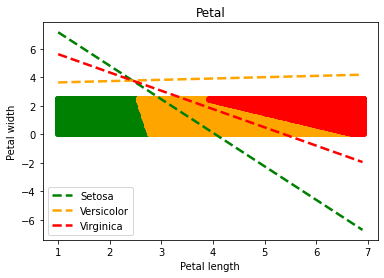

In [30]:
x_train = X2
y_train = Y

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

min_x_0, max_x_0 = min(x_train[:,0]), max(x_train[:,0])
min_x_1, max_x_1 = min(x_train[:,1]), max(x_train[:,1])

x0, x1 = np.meshgrid(np.linspace(min_x_0, max_x_0, 400).reshape(-1, 1), np.linspace(min_x_1, max_x_1, 200).reshape(-1, 1))
x_shape = np.c_[x0.ravel(), x1.ravel()]
    
    
x_pred = log_reg.predict(x_shape)

left_right = np.array([min(x_train[:,0]), max(x_train[:,0])])
b1 = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
b2 = -(log_reg.coef_[1][0] * left_right + log_reg.intercept_[1]) / log_reg.coef_[1][1]
b3 = -(log_reg.coef_[2][0] * left_right + log_reg.intercept_[2]) / log_reg.coef_[2][1]

x_0 = x_shape[x_pred==0]
plt.scatter(x_0[:,0],x_0[:,1],color='green')
x_1 = x_shape[x_pred==1]
plt.scatter(x_1[:,0],x_1[:,1],color='orange')
x_2 = x_shape[x_pred==2]
plt.scatter(x_2[:,0],x_2[:,1],color='red')

plt.plot(left_right, b1, linestyle='--',color='green', label = 'Setosa', linewidth=2.5)
plt.plot(left_right, b2, linestyle='--',color='orange', label= 'Versicolor', linewidth=2.5)
plt.plot(left_right, b3, linestyle='--',color='red', label='Virginica', linewidth=2.5)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.title("Petal")    

plt.show()